<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/elemi10-7506-Trabajo-Practico-2/Tp2_7506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tp-2 Org de datos( FIUBA)


    
      
      
      
***

***
### Importacion de librerias

In [ ]:
#IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

#STEP-1: Import Libraries

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1RAGDjlzJ6spO5Sq8_x3UTIvxLhKAUBEt'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 

downloaded1 = drive.CreateFile({'id':'17pAgG9oJRK1bAFWRKkp96__zicG6yUmy'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('test.csv') 

downloaded2 = drive.CreateFile({'id':'1u8v51BT7FZggIRD-eo0dQno--0wlxIhA'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('sample_submission.csv') 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download("popular")
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import HashingVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score,classification_report
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Using TensorFlow backend.


### Archivos necesarios

In [ ]:
train=pd.read_csv(r"train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test=pd.read_csv(r"test.csv")
test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [ ]:
sample_submission=pd.read_csv(r"sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


## Generacion de algunas variables y nuevos DF

In [ ]:
train_text=train.text
train_target=train.target
test_text=test.text

##### Datasets que con nulos rellenados como 'none'
****
* Despues probar rellenando con 'nokeyword','nolocation'

In [ ]:
train_na=train.fillna(value='none')
test_na=test.fillna(value='none')
train_na['keyword+text']=train_na.text+''+train_na.keyword
test_na['keyword+text']=test_na.text+''+test_na.keyword
train_na['Caracteres']=train_na.text.str.len()
test_na['Caracteres']=test_na.text.str.len()
train_na.tail()

,id,keyword,location,text,target,keyword+text,Caracteres
7608,10869,none,none,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,83
7609,10870,none,none,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,125
7610,10871,none,none,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65
7611,10872,none,none,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,137
7612,10873,none,none,The Latest: More Homes Razed by Northern Calif...,1,The Latest: More Homes Razed by Northern Calif...,94


### Clasificadores

In [ ]:
# Establecemos a la regresion logistica como clasificador
# Arbol como clasificador
cls=LogisticRegression(random_state=0,solver='liblinear')
clf = DecisionTreeClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)


# *MODELOS*
 
  
   
    
     
      

######   **Modelo 0**: Simple

In [ ]:
#Vectorizer, simple 
vectorizer=CountVectorizer()
vectorizer.fit(train_text)
X_train=vectorizer.transform(train_text)
X_test=vectorizer.transform(test_text)
X_train

<7613x21637 sparse matrix of type '<class 'numpy.int64'>'
	with 111497 stored elements in Compressed Sparse Row format>

###### *Modelo 1*: Agregando stopwords y eliminando caracteres tiles y ese tipo de cosas

In [ ]:
#Vectorizer1, agregando stopwords y distintos n_grams
stopwords=stopwords.words('english')
vectorizer1=CountVectorizer(strip_accents='ascii',stop_words=stopwords,ngram_range=(1,5),max_df=0.95)
vectorizer1.fit(train_text)
X_train1=vectorizer1.transform(train_text)
X_test1=vectorizer1.transform(test_text)
X_train1

<7613x232480 sparse matrix of type '<class 'numpy.int64'>'
	with 344172 stored elements in Compressed Sparse Row format>

###### Modelo 2: Uso de TF-IDF 

In [ ]:
#Vectorizer2, usando TF-IDF
vectorizer2=TfidfVectorizer()
vectorizer2.fit(train_text)
X_train2=vectorizer2.transform(train_text)
X_test2=vectorizer2.transform(test_text)
X_train2

<7613x21637 sparse matrix of type '<class 'numpy.float64'>'
	with 111497 stored elements in Compressed Sparse Row format>

###### Modelo 3: Uso de TF-IDF,sacando acentos y analizando varios n_grams

In [ ]:
# Vectorizer3, usando TF-iDF, sacando acentos y agreando n_grams
max_n3=15
vectorizer3=TfidfVectorizer(strip_accents='ascii',ngram_range=(1,max_n3),)
vectorizer3.fit(train_text)
X_train3=vectorizer3.transform(train_text)
X_test3=vectorizer3.transform(test_text)
X_train3

<7613x769185 sparse matrix of type '<class 'numpy.float64'>'
	with 1004105 stored elements in Compressed Sparse Row format>

###### Modelo 4: Inclusion de Lemmatizador, NO incluye uso de TF-IDF

In [ ]:
# Vectorizer4
# Creamos un lemmatizador 
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vectorizer4=CountVectorizer(tokenizer=LemmaTokenizer())
vectorizer4.fit(train_text)
X_train4=vectorizer4.transform(train_text)
X_test4=vectorizer4.transform(test_text)
X_train4

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<7613x22003 sparse matrix of type '<class 'numpy.int64'>'
	with 128166 stored elements in Compressed Sparse Row format>

###### Modelo 5( mejores resultados):  
- Uso de columna keyword + text
- Lemmatizador

In [ ]:
train_text_y_keyword=train_na['keyword+text']
test_text_y_keyword=test_na['keyword+text']

In [ ]:
# Utilizo keyword en mi analisis
vectorizer5=CountVectorizer(tokenizer=LemmaTokenizer())
vectorizer5.fit(train_text_y_keyword)
X_train5=vectorizer5.transform(train_text_y_keyword)
X_test5=vectorizer5.transform(test_text_y_keyword)
X_train5

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<7613x24172 sparse matrix of type '<class 'numpy.int64'>'
	with 130285 stored elements in Compressed Sparse Row format>

###### Modelo 6: Utilizo keyword en mi analisis y TF-IDF

In [ ]:
# Utilizo keyword en mi analisis y TF-IDF
vectorizer6=TfidfVectorizer(tokenizer=LemmaTokenizer())
vectorizer6.fit(train_text_y_keyword)
X_train6=vectorizer6.transform(train_text_y_keyword)
X_test6=vectorizer6.transform(test_text_y_keyword)
X_train6

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<7613x24172 sparse matrix of type '<class 'numpy.float64'>'
	with 130285 stored elements in Compressed Sparse Row format>

###### Modelo 7: Inclusion de columna location

In [ ]:
# Agregamos columna location 
train_text_keyword_location=train_na.text+''+train_na.keyword+''+train_na.location
test_text_keyword_location=test_na.text+''+test_na.keyword+''+test_na.location

In [ ]:
vectorizer7=CountVectorizer(tokenizer=LemmaTokenizer())
vectorizer7.fit(train_text_keyword_location)
X_train7=vectorizer7.transform(train_text_keyword_location)
X_test7=vectorizer7.transform(test_text_keyword_location)
X_train7

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<7613x26489 sparse matrix of type '<class 'numpy.int64'>'
	with 138938 stored elements in Compressed Sparse Row format>

###### Modelo 8: Utilizamos funcion train_test_split.....
- No tiene ningun tipo de mejora al modelo, es solo para probar, se puede utlizar para calcular el Score en lugar de hacer sub
- Despues se generaliza para todo el set de entrenamiento y se predice set de test

In [ ]:
X=train_na['keyword+text']
y=train_na['target']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
vectorizer8=CountVectorizer(strip_accents='ascii',tokenizer=LemmaTokenizer())
vectorizer8.fit(X_train_)
X_train8=vectorizer8.transform(X_train_)
X_test8=vectorizer8.transform(X_test_)
X_train8

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<6090x20596 sparse matrix of type '<class 'numpy.int64'>'
	with 104553 stored elements in Compressed Sparse Row format>

In [ ]:
## Calculamos Score con este metodo, sin hacer cross validation
cls.fit(X_train8,y_train_)
prediction0=cls.predict(X_test8)
print(f1_score(y_test_,prediction0))

0.7618243243243243


In [ ]:
### Progabmos el score con algunos de los clasificadores
gbc.fit(X_train8,y_train_)
cls.fit(X_train8,y_train_)
prediction0=cls.predict(X_test8)
prediction1=gbc.predict(X_test8)
print('RL: {}'.format(f1_score(y_test_,prediction0)))
print('GBC: {}'.format(f1_score(y_test_,prediction1)))

RL: 0.7618243243243243
GBC: 0.6611570247933884


## Clasificador propio
- Lemmatizador
- One-hot
- Cuenta cantidad de caracteres

In [ ]:
class Lemmatizer(BaseEstimator):
    def __init__(self):
        self.l = WordNetLemmatizer()
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        x = map(lambda r:  ' '.join([self.l.lemmatize(i.lower()) for i in r.split()]), x)
        x = np.array(list(x))
        return x

In [ ]:
def length_text(x):
    return np.array(x.str.len()).reshape(-1,1)

In [ ]:
lm=Lemmatizer()
vec=CountVectorizer()
lr=LogisticRegression(random_state=0,solver='liblinear')
clasificador=Pipeline([
    ('features',FeatureUnion([
        ('text',Pipeline([
            ('lm',lm),
            ('vec',vec)])),
        ('lenght',Pipeline([
            ('car',FunctionTransformer(length_text,validate=False))
        ]))
    ])),
    ('lr',lr)
])


- *Cross validation del nuevo clasificador*
- *El texto es text+keyword*

In [ ]:
cross_val_score(estimator=clasificador,X=train_text_y_keyword,y=train_na.target,cv=6,scoring='f1')

array([0.62637363, 0.56611166, 0.59116022, 0.52814739, 0.65868263,
       0.72304833])

* Calculamos f1 para el nuevo clasificador  (Sigue usando el df spliteado)

In [ ]:
clasificador.fit(X_train_,y_train_)
clas_predict=clasificador.predict(X_test_)
f1_score(clas_predict,y_test_)

0.7615894039735099

**Modelo con DF nulos rellenados con otros nombres**

In [ ]:

scaler = StandardScaler()
train_fill=train.fillna(value={'keyword':'nokeyword','location':'nolocation'})
test_fill=test.fillna(value={'keyword':'nokeyword','location':'nolocation'})
train_fill['text+keyword']=train_fill.text+''+train_fill.keyword
test_fill['text+keyword']=test_fill.text+''+test_fill.keyword
train_fill['Caracteres']=scaler.fit_transform(np.array(train_fill.text.str.len()).reshape(-1,1))
test_fill['Caracteres']=scaler.fit_transform(np.array(test_fill.text.str.len()).reshape(-1,1))
train_fill.tail()

,id,keyword,location,text,target,text+keyword,Caracteres
7608,10869,nokeyword,nolocation,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,-0.533982
7609,10870,nokeyword,nolocation,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,0.709390
7610,10871,nokeyword,nolocation,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,-1.066856
7611,10872,nokeyword,nolocation,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,1.064639
7612,10873,nokeyword,nolocation,The Latest: More Homes Razed by Northern Calif...,1,The Latest: More Homes Razed by Northern Calif...,-0.208337


In [ ]:
vectorizer9=TfidfVectorizer(tokenizer=LemmaTokenizer())
X_train9=vectorizer9.fit_transform(train_fill['text+keyword'])
X_test9=vectorizer9.transform(test_fill['text+keyword'])
X_train9


<7613x24173 sparse matrix of type '<class 'numpy.float64'>'
	with 130285 stored elements in Compressed Sparse Row format>

In [ ]:
XX_train=pd.concat([train_fill['Caracteres'].to_frame(),pd.DataFrame(X_train9.toarray())],axis=1)
YY_train=train_fill.target
XX_test=pd.concat([test_fill['Caracteres'].to_frame(),pd.DataFrame(X_test9.toarray())],axis=1)

In [ ]:
cls.fit(XX_train,YY_train)
predict=cls.predict(XX_test)
sample_submission['target']=predict




In [ ]:
from google.colab import files
sample_submission.to_csv("sub_10.csv",index=False)
files.download('sub_10.csv')


In [ ]:

XX_train_, XX_test_, YY_train_, YY_test_ = train_test_split(XX_train, YY_train, test_size=0.20, random_state=0)
params={'C':np.logspace(-3,3,7),'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
cls=LogisticRegression()
grid=GridSearchCV(cls,params,cv=8,scoring='f1')
grid.fit(XX_train_,YY_train_)
print('parametros tuneados con grid search: {}'.format(grid.best_params_))
print('f1: ',grid.best_score_)

In [ ]:
grid.best_params_

{'C': 1.0}

In [ ]:
model=rfc.fit(XX_train_,YY_train_)
predict=rfc.predict(XX_test_)

* Generalizamos para todo el set de train, asi tiene mayor corpus
* Hacemos submit con nuevo clasificador
* (No tiene el mejor resultado en kaggle, seria bueno hacer un grid search)

In [ ]:
# Ahora hacemos que utilice todo el dataset, asi tiene mayor corpus
clasificador.fit(train_text_y_keyword,train_na.target)
sample_submission['target']=clasificador.predict(test_text_y_keyword)
sample_submission.to_csv('sub_9(class).csv',index=False)

In [ ]:
RC=RidgeClassifier()
RC.fit(X_train8,y_train_)
RC_predict=RC.predict(X_test8)
f1_score(RC_predict,y_test_)

0.7344827586206896

In [ ]:
# Por curisidad 
print(X_train[0].todense())
print(X_train1[0].todense())
print(X_train2[0].todense())
print(X_train3[0].todense())
print(X_train4[0].todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0 1 0 ... 0 0 0]]


In [ ]:
# Establecemos un score, usamos f1 que es el utilizado en competencia
score=model_selection.cross_val_score(cls,X_train,train.target,cv=10,scoring='f1')
score

C:\Users\jinci\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.62956522, 0.56218058, 0.51779935, 0.5152    , 0.5800317 ,
       0.6048    , 0.58983051, 0.52532833, 0.70788253, 0.72941176])

# Redes 

In [ ]:
## Hacemos el test_train metodo
XX_train_, XX_test_, YY_train_, YY_test_ = train_test_split(XX_train, YY_train, test_size=0.20, random_state=0)

In [ ]:
train_fill.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'text+keyword',
       'Caracteres'],
      dtype='object')

In [ ]:
x_train=train_fill.loc[:,('keyword','text','Caracteres')]
y_train=train_fill.loc[:,('target')]
x_test=test_fill.loc[:,('keyword','text','Caracteres')]

In [ ]:
dim=XX_train_.shape[1]
modelito=Sequential()
modelito.add(layers.Dense(5,input_dim=dim,activation='relu'))
modelito.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
modelito.compile(loss='binary_crossentropy',\
                 optimizer='adam',\
                 metrics=['accuracy'])
modelito.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 5)                 120875    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 120,881
Trainable params: 120,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tweets=modelito.fit(XX_train_,YY_train_,\
                    epochs=100,verbose=False,\
                    validation_data=(XX_test_,YY_test_),batch_size=50)

In [ ]:
modelito.evaluate(XX_train_, YY_train_, verbose=False)

[0.004337608317252394, 0.9975369572639465]

In [ ]:
modelito.evaluate(XX_test_,YY_test_,verbose=False)

[1.4700810573481449, 0.75114905834198]

In [ ]:
pred=modelito.predict(XX_test_)
pred_bool=np.round(pred).astype(int)
print(classification_report(YY_test_,pred_bool))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       886
           1       0.70      0.70      0.70       637

    accuracy                           0.75      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.75      0.75      0.75      1523



In [ ]:
def plot_history(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(122)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [ ]:
plot_history(tweets)

TypeError: ignored

In [ ]:
dim1=XX_train.shape[1]
red1=Sequential()
red1.add(layers.Dense(5,input_dim=dim,activation='relu'))
red1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
red1.compile(loss='binary_crossentropy',\
                 optimizer='adam',\
                 metrics=['accuracy'])
red1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 5)                 120875    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 6         
Total params: 120,881
Trainable params: 120,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tweets1=red1.fit(XX_train,YY_train,\
                    epochs=100,verbose=False,\
                    batch_size=50)

In [ ]:
pred_red1=red1.predict(XX_test)
pred_red1=np.round(pred_red1).astype(int)
sample_submission['target']=pred_red1
sample_submission.to_csv('sub11(RN).csv',index=False)


In [ ]:
from google.colab import files
files.download('sub11(RN).csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DF para hacer Embedding

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train_fill['text+keyword'],train_fill['target'], test_size=0.20, random_state=0)

# Embeddings

In [ ]:
token=Tokenizer(num_words=5000)
token.fit_on_texts(X_train)


In [ ]:
X_emb_train=token.texts_to_sequences(X_train)
X_emb_test=token.texts_to_sequences(X_test)
vocab_size=len(token.word_index)+1
maxlen=100


In [ ]:
X_emb_train=pad_sequences(X_emb_train,padding='post',maxlen=maxlen)
X_emb_test=pad_sequences(X_emb_test,padding='post',maxlen=maxlen)

In [ ]:
print(X_emb_train[0,:].shape)

(100,)


In [ ]:
model2=Sequential()

In [ ]:
dims=50
model2.add(layers.Embedding(input_dim=vocab_size,input_length=100,output_dim=dims))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 50)           1035300   
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 50)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 12)                612       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 13        
Total params: 1,035,925
Trainable params: 1,035,925
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tweets_emb=model2.fit(X_emb_train,y_train,epochs=20,verbose=2,validation_data=(X_emb_test,y_test),\
                     batch_size=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/20


KeyboardInterrupt: ignored

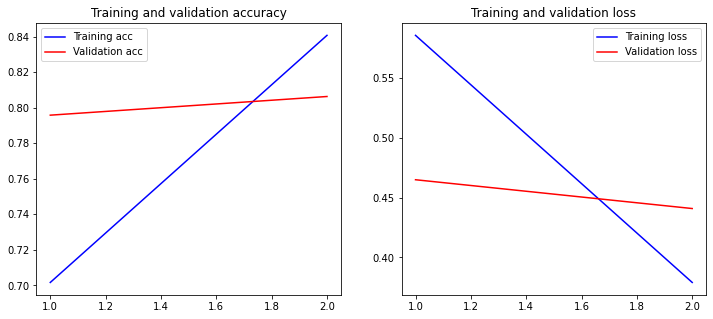

In [ ]:
plot_history(tweets_emb)

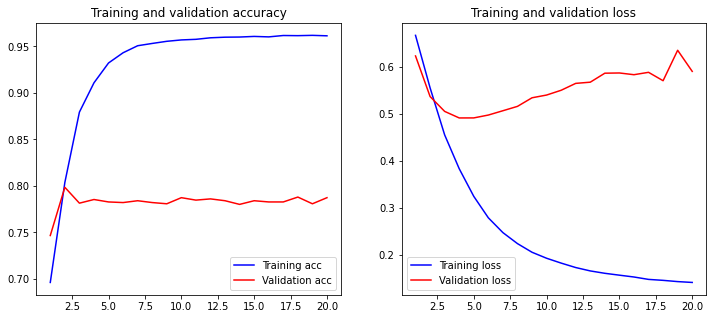

In [ ]:
graf_52032=plot_history(tweets_emb)

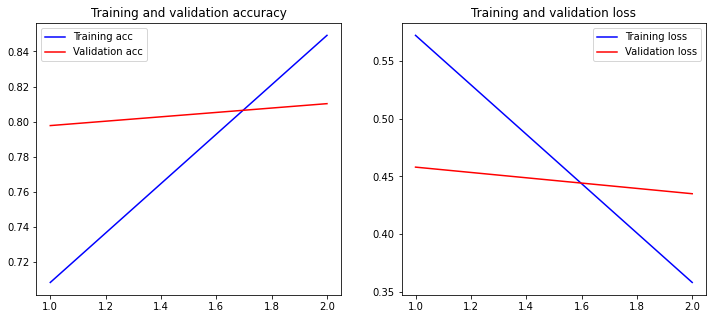

In [ ]:
graf_10210=plot_history(tweets_emb)

In [ ]:
pred=model.predict(X_emb_test)
pred_bool=np.round(pred).astype(int)
print(classification_report(y_test,pred_bool))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       886
           1       0.75      0.68      0.71       637

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



Generalizacion

In [ ]:
token1=Tokenizer(num_words=5000)
token1.fit_on_texts(train_fill['text+keyword'])


In [ ]:
X_emb_train=token1.texts_to_sequences(train_fill['text+keyword'])
X_emb_test=token1.texts_to_sequences(test_fill['text+keyword'])
vocab_size=len(token1.word_index)+1

In [ ]:
X_emb_train=pad_sequences(X_emb_train,padding='post',maxlen=100)
X_emb_test=pad_sequences(X_emb_test,padding='post',maxlen=100)

In [ ]:
sub12=Sequential()
dims=50
sub12.add(layers.Embedding(input_dim=vocab_size,input_length=100,output_dim=dims))
sub12.add(layers.GlobalMaxPool1D())
sub12.add(layers.Dense(10, activation='relu'))
sub12.add(layers.Dense(1, activation='sigmoid'))
sub12.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
sub12.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 100, 50)           1210150   
_________________________________________________________________
global_max_pooling1d_21 (Glo (None, 50)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 1,210,671
Trainable params: 1,210,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tweets_emb=sub12.fit(X_emb_train,train_fill['target'],epochs=2,verbose=2,\
                     batch_size=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
 - 15s - loss: 0.5641 - accuracy: 0.7197
Epoch 2/2
 - 14s - loss: 0.3644 - accuracy: 0.8474


In [ ]:
from google.colab import files
pred_emb=sub12.predict(X_emb_test)
pred_emb=np.round(pred_emb).astype(int)
sample_submission['target']=pred_emb
sample_submission.to_csv('sub12(EMB).csv',index=False)
files.download('sub12(EMB).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Embedding pre-entrenado**






In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train_fill['text+keyword'],train_fill['target'], test_size=0.20, random_state=0)

In [ ]:
from google.colab import files
glove=files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(r'glove.6B.100d.txt',token.word_index, embedding_dim)

In [ ]:
vocab_size=len(token.word_index)+1
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.528494156283203

In [ ]:
model_gl= Sequential()
model_gl.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=embedding_dim, 
                           trainable=True))
model_gl.add(layers.GlobalMaxPool1D())
model_gl.add(layers.Dense(10, activation='relu'))
model_gl.add(layers.Dense(1, activation='sigmoid'))
model_gl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_gl.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 50, 50)            1035300   
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 1,035,821
Trainable params: 1,035,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tweets_gl=model_gl.fit(X_emb_train,y_train,epochs=5,verbose=2,validation_data=(X_emb_test,y_test),\
                     batch_size=10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/5
 - 8s - loss: 0.5969 - accuracy: 0.6893 - val_loss: 0.5345 - val_accuracy: 0.7505
Epoch 2/5
 - 8s - loss: 0.4833 - accuracy: 0.7732 - val_loss: 0.5050 - val_accuracy: 0.7544
Epoch 3/5
 - 8s - loss: 0.4125 - accuracy: 0.8171 - val_loss: 0.4822 - val_accuracy: 0.7833
Epoch 4/5
 - 8s - loss: 0.3622 - accuracy: 0.8488 - val_loss: 0.4716 - val_accuracy: 0.7859
Epoch 5/5
 - 8s - loss: 0.3146 - accuracy: 0.8701 - val_loss: 0.4775 - val_accuracy: 0.7892


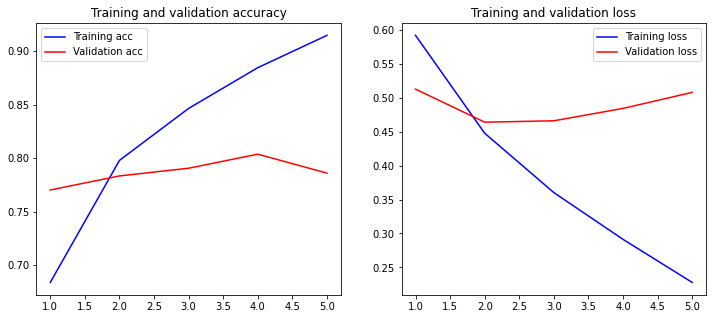

In [ ]:
plot_history(tweets_gl)

Generalizacion

In [ ]:
token1=Tokenizer(num_words=5000)
token1.fit_on_texts(train_fill['text+keyword'])

In [ ]:
X_emb_train_1=token1.texts_to_sequences(train_fill['text+keyword'])
X_emb_test_1=token1.texts_to_sequences(test_fill['text+keyword'])
vocab_size=len(token1.word_index)+1

In [ ]:
X_emb_train_1=pad_sequences(X_emb_train_1,padding='post',maxlen=100)
X_emb_test_1=pad_sequences(X_emb_test_1,padding='post',maxlen=100)

In [ ]:
embedding_dim = 100
embedding_matrix_1 = create_embedding_matrix(r'glove.6B.100d.txt',token1.word_index, embedding_dim)

In [ ]:
vocab_size=len(token1.word_index)+1
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.5067553609056729

In [ ]:
sub13= Sequential()
sub13.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=50, 
                           trainable=True))
sub13.add(layers.GlobalMaxPool1D())
sub13.add(layers.Dense(10, activation='relu'))
sub13.add(layers.Dense(1, activation='sigmoid'))
sub13.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
sub13.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 50, 50)            1210150   
_________________________________________________________________
global_max_pooling1d_16 (Glo (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 1,210,671
Trainable params: 1,210,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tweets_gl=sub13.fit(X_emb_train,train_fill['target'],epochs=5,verbose=2,batch_size=10)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
 - 11s - loss: 0.6163 - accuracy: 0.6647
Epoch 2/5
 - 11s - loss: 0.4689 - accuracy: 0.7851
Epoch 3/5
 - 11s - loss: 0.4020 - accuracy: 0.8218
Epoch 4/5
 - 11s - loss: 0.3518 - accuracy: 0.8474
Epoch 5/5
 - 11s - loss: 0.3122 - accuracy: 0.8713


In [ ]:
from google.colab import files
pred_gl=sub13.predict(X_emb_test)
pred_gl=np.round(pred_gl).astype(int)
sample_submission['target']=pred_gl
sample_submission.to_csv('sub13(GLOVE).csv',index=False)
files.download('sub13(GLOVE).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CONV1d

In [ ]:
emb_dim=100
conv=Sequential()
conv.add(layers.Embedding(vocab_size,emb_dim,input_length=100,weights=[embedding_matrix], trainable=True))
conv.add(layers.Conv1D(128, 5, activation='relu'))
conv.add(layers.GlobalMaxPooling1D())
conv.add(layers.Dense(10, activation='relu'))
conv.add(layers.Dense(1, activation='sigmoid'))
conv.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
conv.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          2070600   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 2,136,029
Trainable params: 2,136,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tw_conv=conv.fit(X_emb_train,y_train,epochs=10,verbose=2,
                 validation_data=(X_emb_test,y_test),batch_size=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6090 samples, validate on 1523 samples
Epoch 1/10
 - 50s - loss: 0.4758 - accuracy: 0.7833 - val_loss: 0.4327 - val_accuracy: 0.8017
Epoch 2/10
 - 50s - loss: 0.3496 - accuracy: 0.8499 - val_loss: 0.5631 - val_accuracy: 0.7269
Epoch 3/10
 - 50s - loss: 0.2566 - accuracy: 0.8980 - val_loss: 0.4910 - val_accuracy: 0.8037
Epoch 4/10
 - 51s - loss: 0.1740 - accuracy: 0.9322 - val_loss: 0.5794 - val_accuracy: 0.7853
Epoch 5/10
 - 50s - loss: 0.1214 - accuracy: 0.9560 - val_loss: 0.6096 - val_accuracy: 0.7879
Epoch 6/10
 - 49s - loss: 0.0793 - accuracy: 0.9670 - val_loss: 1.0543 - val_accuracy: 0.7840
Epoch 7/10
 - 50s - loss: 0.0718 - accuracy: 0.9701 - val_loss: 0.8846 - val_accuracy: 0.8043
Epoch 8/10
 - 50s - loss: 0.0658 - accuracy: 0.9741 - val_loss: 0.7941 - val_accuracy: 0.7800
Epoch 9/10
 - 51s - loss: 0.0567 - accuracy: 0.9731 - val_loss: 1.0653 - val_accuracy: 0.7879
Epoch 10/10
 - 51s - loss: 0.0503 - accuracy: 0.9773 - val_loss: 1.1862 - val_accuracy: 0.7761


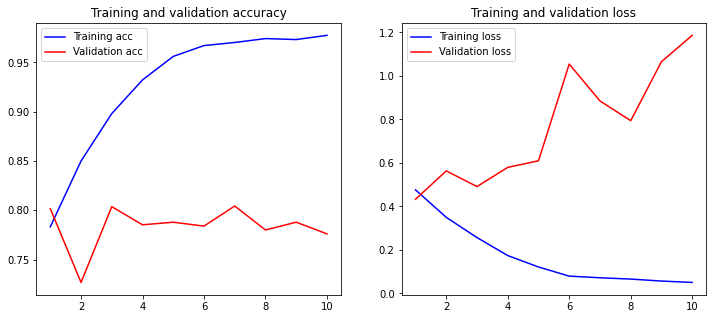

In [ ]:
plot_history(tw_conv)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(init_mode='he_uniform'):

    model=Sequential()
    model.add(layers.Embedding(vocab_size,emb_dim,input_length=100,weights=[embedding_matrix], trainable=False))
    model.add(layers.Conv1D(num_filters,kernel_size, activation='relu',kernel_initializer=init_mode))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu',kernel_initializer=init_mode))
    model.add(layers.Dense(1, activation='sigmoid',kernel_initializer=init_mode))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
%%time
seed = 0
np.random.seed(seed)
batch_size = 64
epochs = 10

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=2)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_emb_train, y_train)

In [ ]:
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.7635468045870463 using {'init_mode': 'he_uniform'}
 mean=0.7455, std=0.003737 using {'init_mode': 'uniform'}
 mean=0.7529, std=0.01552 using {'init_mode': 'lecun_uniform'}
 mean=0.7535, std=0.01427 using {'init_mode': 'normal'}
 mean=0.5675, std=0.003141 using {'init_mode': 'zero'}
 mean=0.7562, std=0.006978 using {'init_mode': 'glorot_normal'}
 mean=0.7525, std=0.01061 using {'init_mode': 'glorot_uniform'}
 mean=0.7537, std=0.007251 using {'init_mode': 'he_normal'}
 mean=0.7635, std=0.01088 using {'init_mode': 'he_uniform'}


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model_1(num_filters,kernel_size,vocab_size,embedding_dim,maxlen,init_mode='he_uniform'):

    model=Sequential()
    model.add(layers.Embedding(vocab_size,emb_dim,input_length=maxlen,weights=[embedding_matrix], trainable=True))
    model.add(layers.Conv1D(num_filters,kernel_size, activation='relu',kernel_initializer=init_mode))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu',kernel_initializer=init_mode))
    model.add(layers.Dense(1, activation='sigmoid',kernel_initializer=init_mode))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
# Tuneo de hiperparametros
%%time
seed = 0
np.random.seed(seed)
param_grid_1= dict(num_filters=[32, 64, 128],kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],embedding_dim=[embedding_dim],
                  maxlen=[maxlen],epochs=[10,20],
                  batch_size=[10,32,64])
model_1 = KerasClassifier(build_fn=create_model_1, verbose=2)
grid_1= RandomizedSearchCV(estimator=model_1, param_distributions=param_grid_1,
                           cv=4, verbose=2, n_iter=5,n_jobs=-1,scoring='f1')
grid_result_1 = grid_1.fit(X_emb_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 48.3min finished
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
 - 12s - loss: 0.5345 - accuracy: 0.7389
Epoch 2/20
 - 13s - loss: 0.4116 - accuracy: 0.8176
Epoch 3/20
 - 13s - loss: 0.3207 - accuracy: 0.8688
Epoch 4/20
 - 12s - loss: 0.2520 - accuracy: 0.9066
Epoch 5/20
 - 13s - loss: 0.1930 - accuracy: 0.9358
Epoch 6/20
 - 13s - loss: 0.1391 - accuracy: 0.9563
Epoch 7/20
 - 13s - loss: 0.1126 - accuracy: 0.9667
Epoch 8/20
 - 13s - loss: 0.0944 - accuracy: 0.9711
Epoch 9/20
 - 13s - loss: 0.0830 - accuracy: 0.9750
Epoch 10/20
 - 13s - loss: 0.0741 - accuracy: 0.9773
Epoch 11/20
 - 13s - loss: 0.0751 - accuracy: 0.9772
Epoch 12/20
 - 13s - loss: 0.0741 - accuracy: 0.9796
Epoch 13/20
 - 13s - loss: 0.0706 - accuracy: 0.9785
Epoch 14/20
 - 13s - loss: 0.0647 - accuracy: 0.9798
Epoch 15/20
 - 13s - loss: 0.0621 - accuracy: 0.9780
Epoch 16/20
 - 13s - loss: 0.0544 - accuracy: 0.9800
Epoch 17/20
 - 13s - loss: 0.0563 - accuracy: 0.9795
Epoch 18/20
 - 13s - loss: 0.0512 - accuracy: 0.9798
Epoch 19/20
 - 13s - loss: 0.0533 - accuracy: 0.9808
Ep

In [ ]:
plot_history(grid_result_1)

AttributeError: ignored

In [ ]:
parametros=grid_result_1.best_params_
parametros

{'batch_size': 64,
 'embedding_dim': 100,
 'epochs': 20,
 'kernel_size': 7,
 'maxlen': 100,
 'num_filters': 128,
 'vocab_size': 20706}

**Generalizacion**

In [ ]:
init_mode='he_uniform'
sub_14=Sequential()
sub_14.add(layers.Embedding(vocab_size,emb_dim,input_length=100,weights=[embedding_matrix_1], trainable=True))
sub_14.add(layers.Conv1D(128,kernel_size=7, activation='relu',kernel_initializer=init_mode))
sub_14.add(layers.GlobalMaxPooling1D())
sub_14.add(layers.Dense(10, activation='relu',kernel_initializer=init_mode))
sub_14.add(layers.Dense(1, activation='sigmoid',kernel_initializer=init_mode))
sub_14.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
sub_14.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          2420300   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 94, 128)           89728     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 2,511,329
Trainable params: 2,511,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
tw_sub14=sub_14.fit(X_emb_train_1,train_fill['target'],epochs=20,verbose=2,batch_size=64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
 - 16s - loss: 0.4946 - accuracy: 0.7613
Epoch 2/20
 - 16s - loss: 0.3702 - accuracy: 0.8434
Epoch 3/20
 - 16s - loss: 0.3017 - accuracy: 0.8802
Epoch 4/20
 - 15s - loss: 0.2349 - accuracy: 0.9176
Epoch 5/20
 - 15s - loss: 0.1801 - accuracy: 0.9418
Epoch 6/20
 - 15s - loss: 0.1394 - accuracy: 0.9567
Epoch 7/20
 - 15s - loss: 0.1206 - accuracy: 0.9632
Epoch 8/20
 - 15s - loss: 0.1043 - accuracy: 0.9682
Epoch 9/20
 - 15s - loss: 0.0951 - accuracy: 0.9707
Epoch 10/20
 - 16s - loss: 0.0876 - accuracy: 0.9732
Epoch 11/20
 - 16s - loss: 0.0767 - accuracy: 0.9756
Epoch 12/20
 - 16s - loss: 0.0761 - accuracy: 0.9761
Epoch 13/20
 - 16s - loss: 0.0736 - accuracy: 0.9765
Epoch 14/20
 - 17s - loss: 0.0609 - accuracy: 0.9790
Epoch 15/20
 - 16s - loss: 0.0521 - accuracy: 0.9789
Epoch 16/20
 - 16s - loss: 0.0468 - accuracy: 0.9796
Epoch 17/20
 - 16s - loss: 0.0447 - accuracy: 0.9808
Epoch 18/20
 - 16s - loss: 0.0415 - accuracy: 0.9817
Epoch 19/20
 - 16s - loss: 0.0415 - accuracy: 0.9815
Ep

In [ ]:
from google.colab import files
pred_sub_14=sub_14.predict(X_emb_test_1)
pred_sub_14=np.round(pred_sub_14).astype(int)
sample_submission['target']=pred_sub_14
sample_submission.to_csv('sub14(GLOVE_tun).csv',index=False)
files.download('sub14(GLOVE_tun).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>